# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

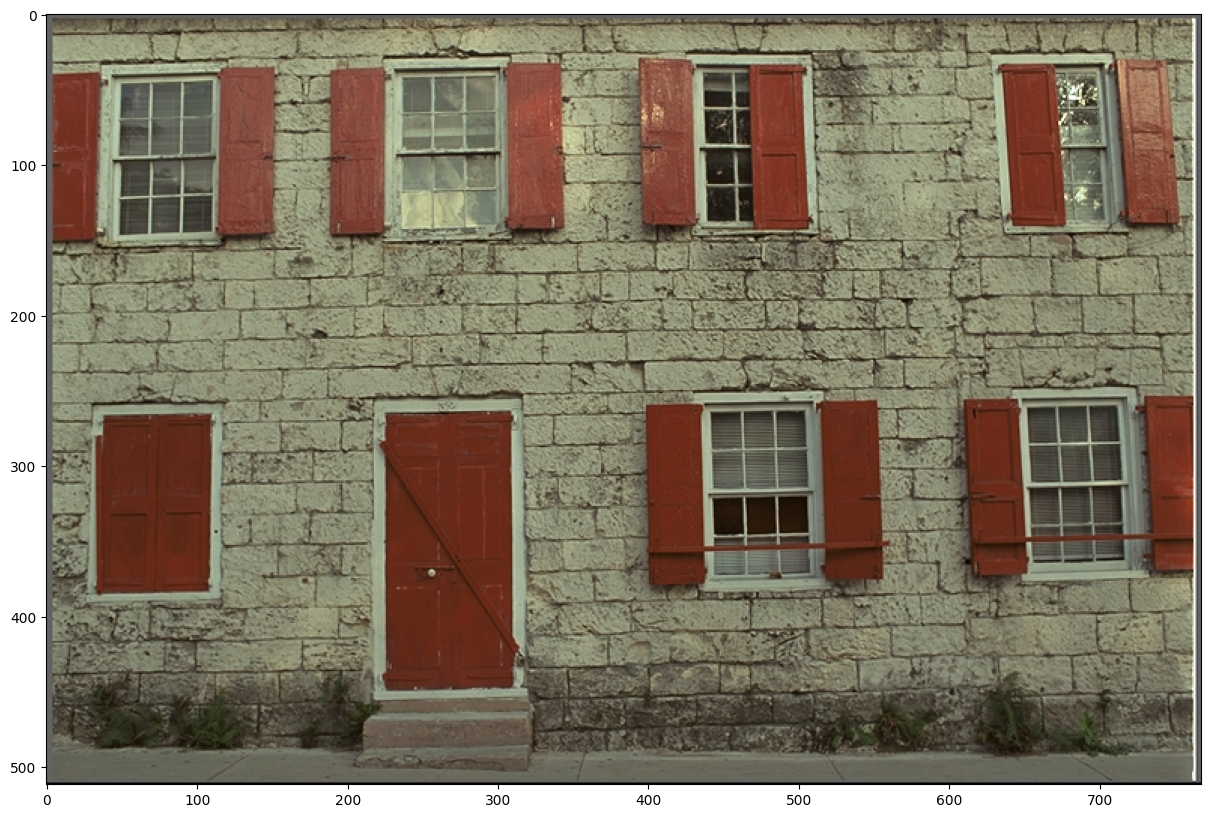

In [33]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

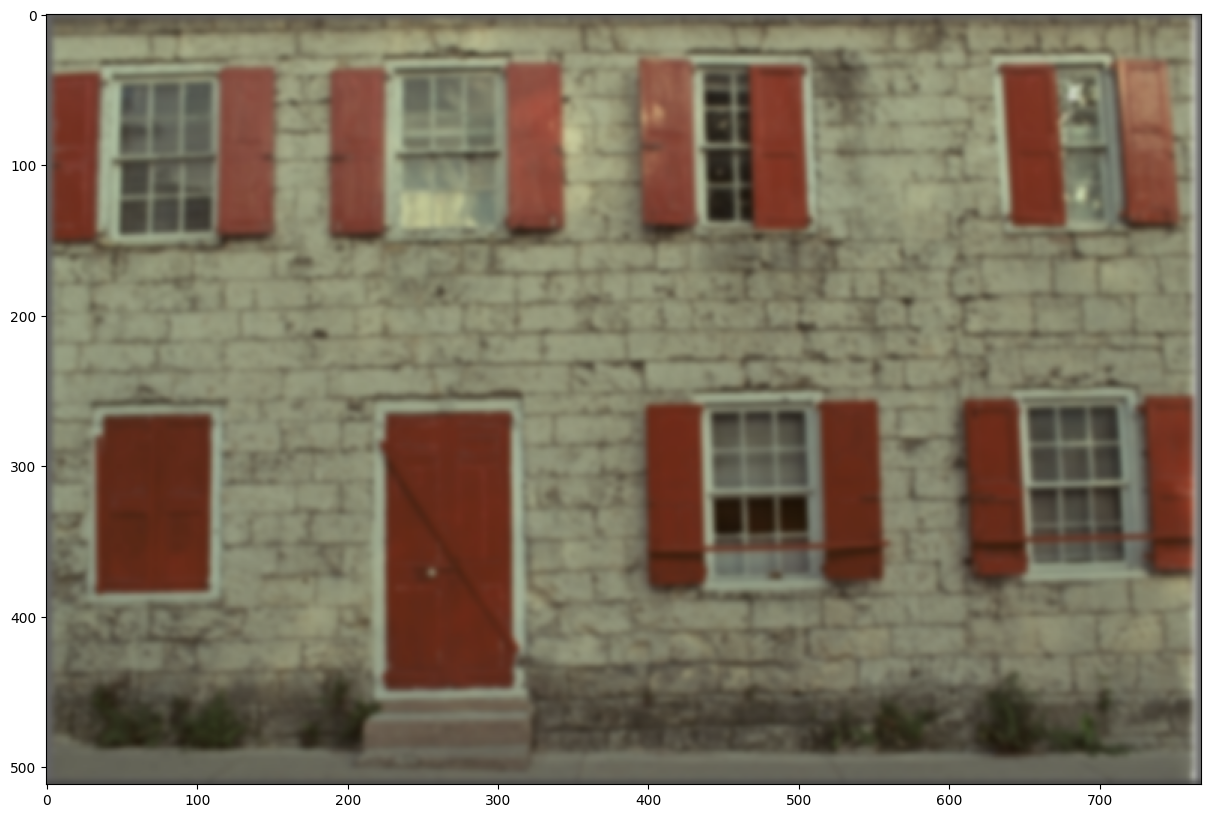

In [34]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp_image = cv2.GaussianBlur(img, (11, 11), 0)
# Отображение исходного и размытого изображений
plt.imshow(unsharp_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-120.0..153.0].


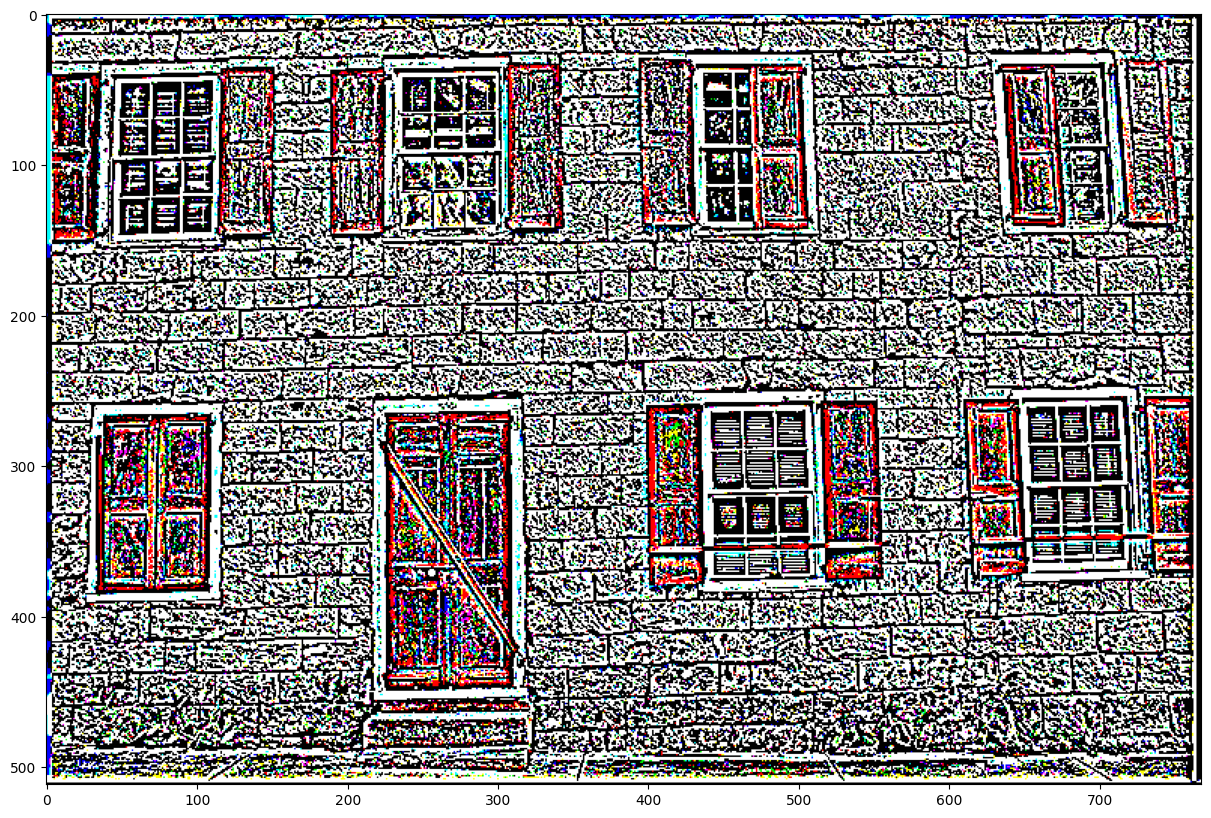

In [35]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
# Преобразование изображений в float32 для предотвращения переполнения/недополнения
image_float = img.astype(np.float32)
unsharp_image_float = unsharp_image.astype(np.float32)
diff = image_float - unsharp_image_float
plt.imshow(diff)

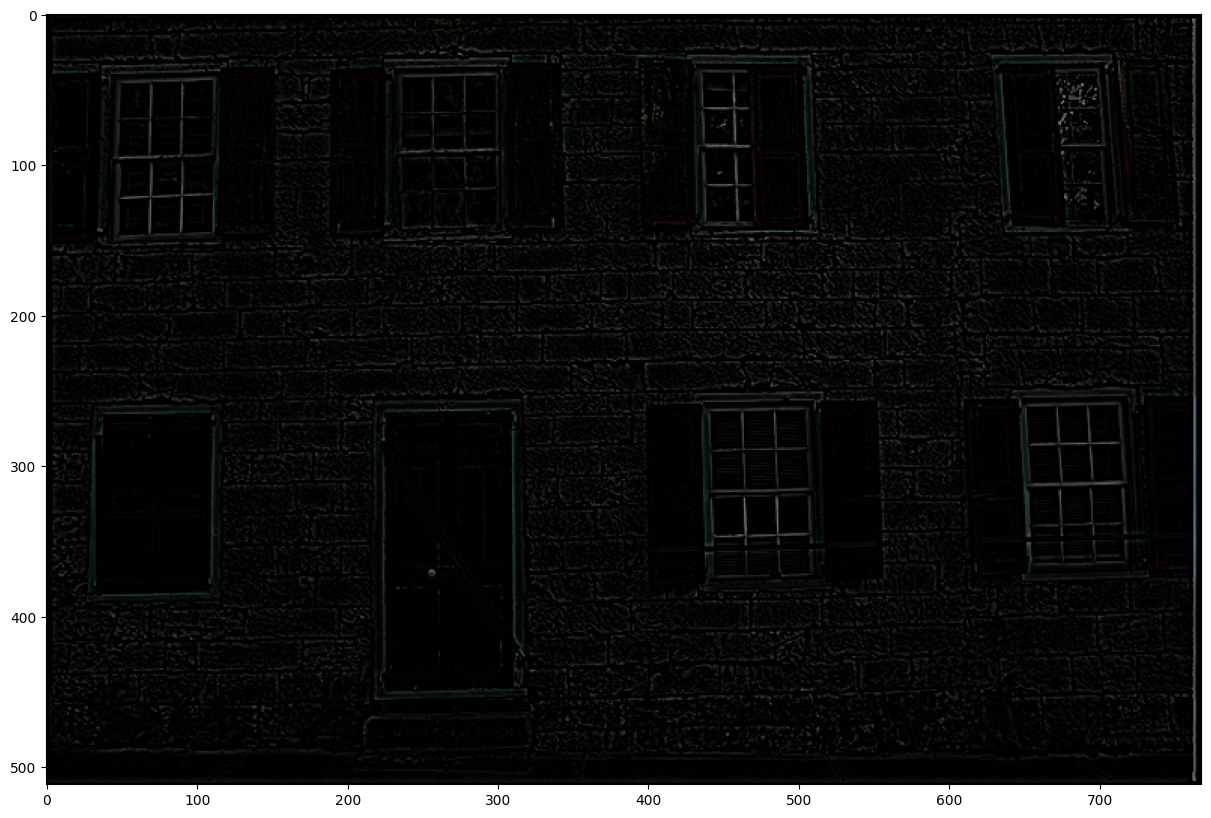

In [36]:

# Приведение результата обратно к uint8
# Обработка отрицательных значений и значений, превышающих 255
diff = np.clip(diff, 0, 255).astype(np.uint8)
plt.imshow(diff)

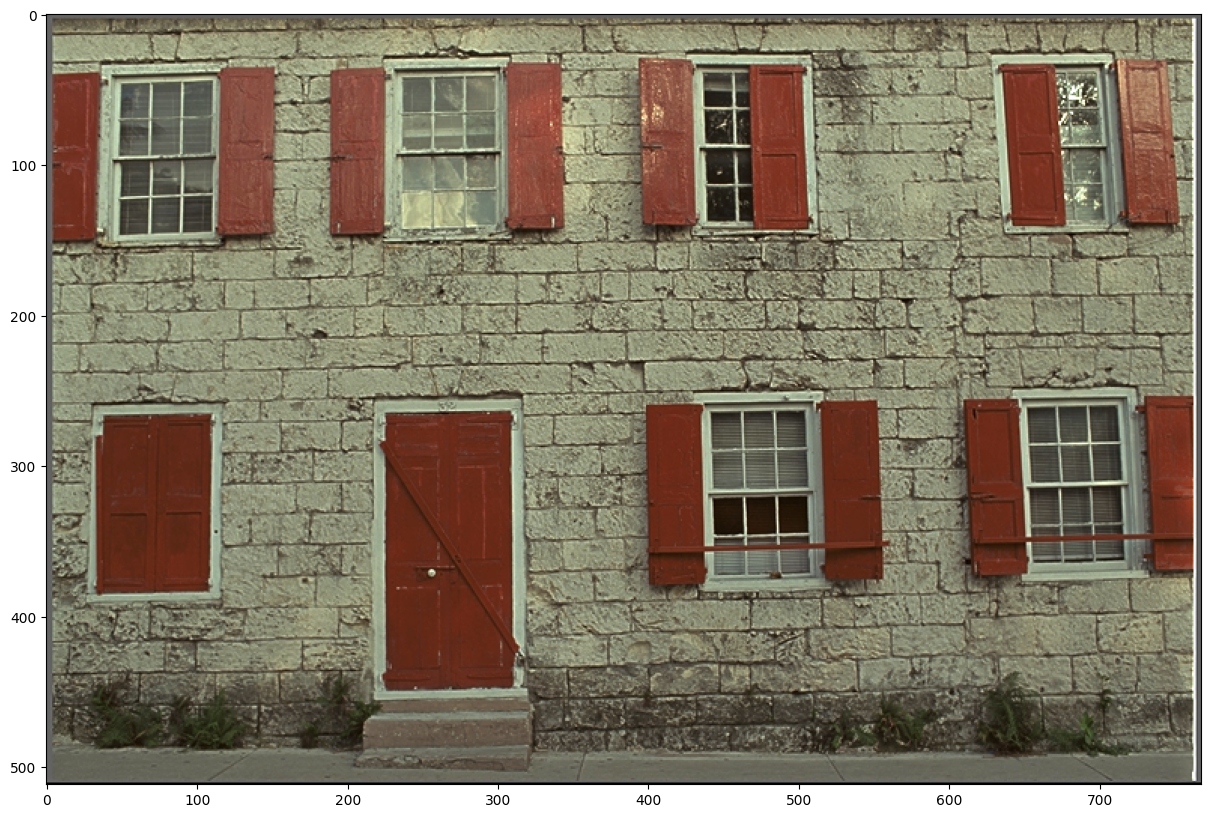

In [37]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.

# Определение коэффициента усиления (amount)
amount = 0.5
# Применение Unsharp Mask
sharpened_float = image_float + diff * amount
# Обработка переполнения и недополнения
sharpened = np.clip(sharpened_float, 0, 255).astype(np.uint8)
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
* ###        It usually ranges from 0.5 to 2.0.


 * What happens if it is too small?
* ###        Small values (eg 0.5 - 1.0): These values usually give a more natural sharpening effect.


 * What happens if it is too large?
* ###        Larger values (eg 1.5 - 2.0): These values produce more aggressive sharpening, which can be useful for images with low contrast or blurred detail. However, these values can also increase noise and make the image appear less natural.